In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
import glob


In [2]:
#complete code with list
#input files for all spectra (for testing just one file)
#data_name_list=["Test1","Test2","Test3"] #this would later be the file name
#data_file_list=["spectrum.pl","spectrum.pl","spectrum.pl"]
data_file_list=glob.glob('./spectral_Data/spectras/*')
#initilize empty list for ease of sorting:
sorted_file_list = [None]*(len(data_file_list))
print(len(sorted_file_list), len(data_file_list))
for i in range(0,len(data_file_list)):
    #isolate the number from the file name
    run_number_from_file=int(data_file_list[i].split("spectrum")[1].split(".")[0])
    #print(i, run_number_from_file)
    
    #take the position in the sorted list based on the run number from the file name at position i 
    #(should be quite quick)
    sorted_file_list[run_number_from_file]=data_file_list[i]
    
#print(sorted_file_list)    

729 729


In [12]:
df_highest_max_list=[] #list for df later
test_list_num_peaks=[]
df_all_max_list=[]

#df_results=pd.DataFrame(columns=['main_maximum', 'all_maxima', 'k6a1','k6a2','k11', 'k12','k9a1','k9a2']).rename(index={'','Spectrum Number:'})

main_dictionary={'main_maximum':[], 'all_maxima':[],'no_of_max':[],'Intensity':[]}#, 'k6a1':[],'k6a2':[],'k11':[], 'k12':[],'k9a1':[],'k9a2':[]}

for data_file in sorted_file_list:
    #print(data_file)
    df = pd.read_csv(data_file[:],sep="   ",header =2,engine='python')
    df=df.dropna(1) #remove all na entrys
    df.rename(columns={'#': 'Energy',' Energy':'g1','Unnamed: 2':'g2','Unnamed: 3':'g3'}, 
              inplace=True) 
    df_maxima=df.iloc[find_peaks(df.g1.values,height=df.g1.max()*0.2)[0]   ].dropna().drop(columns=['g2','g3'])
    #print(df_maxima)
    main_max=df_maxima.nlargest(1,'g1')["Energy"].values[0]
    #print("\n",main_max)
    main_dictionary["main_maximum"].append(main_max)
    main_dictionary["all_maxima"].append(df_maxima["Energy"].values)
    main_dictionary["no_of_max"].append(len(df_maxima["Energy"].values))
    main_dictionary["Intensity"].append(df_maxima["g1"].values)
df_reduced_results = pd.DataFrame(main_dictionary)               

In [13]:
print(len(df_reduced_results))
df_reduced_results.head()


729


,main_maximum,all_maxima,no_of_max,Intensity
0,0.748,"[-0.758, -0.69, -0.612, -0.472, -0.406, -0.328...",18,"[5.20690186, 6.88780025, 3.5507148, 6.73106847..."
1,-0.574,"[-0.574, -0.048, 0.034, 0.596, 0.658]",5,"[23.8435403, 11.0445002, 15.0444894, 11.253787..."
2,0.732,"[-0.928, -0.776, -0.708, -0.628, -0.486, -0.42...",19,"[1.93005472, 5.11297673, 7.14367604, 3.6119469..."
3,0.734,"[-0.926, -0.778, -0.712, -0.628, -0.486, -0.42...",19,"[1.91987695, 5.05196242, 7.19555908, 3.5980832..."
4,-0.560,"[-0.56, -0.03, 0.046, 0.614, 0.674]",5,"[23.8370405, 10.0746272, 14.895134200000001, 1..."


In [10]:
#load data inputs from file
df_data_inputs = pd.read_csv("spectral_Data/all_729_configuration.txt",sep=";",engine='python')


df_concoctate=pd.concat([df_reduced_results.reset_index(),df_data_inputs],axis=1).drop(columns="index")
#normalize data
#print(get_max_intensity)
df_concoctate["Energy_highest_max_normalized"]=0.5*(df_concoctate["main_maximum"]+1)
df_concoctate["Energy_all_max_normalized"]=0.5*(df_concoctate["all_maxima"]+1)
df_concoctate["k6a1"]=0.5*(df_concoctate["k6a1"]+1)
df_concoctate["k6a2"]=0.5*(df_concoctate["k6a2"]+1)
df_concoctate["k11"]=0.5*(df_concoctate["k11"]+1)
df_concoctate["k12"]=0.5*(df_concoctate["k12"]+1)
df_concoctate["k9a1"]=0.5*(df_concoctate["k9a1"]+1)
df_concoctate["k9a2"]=0.5*(df_concoctate["k9a2"]+1)
df_concoctate=df_concoctate.dropna()
df_concoctate.head(50)

,main_maximum,all_maxima,no_of_max,Intensity,k6a1,k6a2,k11,k12,k9a1,k9a2,Energy_highest_max_normalized,Energy_all_max_normalized
0,0.748,"[-0.758, -0.69, -0.612, -0.472, -0.406, -0.328...",18,"[5.20690186, 6.88780025, 3.5507148, 6.73106847...",0.25,0.25,0.25,0.25,0.25,0.25,0.874,"[0.121, 0.15500000000000003, 0.194, 0.264, 0.2..."
1,-0.574,"[-0.574, -0.048, 0.034, 0.596, 0.658]",5,"[23.8435403, 11.0445002, 15.0444894, 11.253787...",0.25,0.25,0.25,0.25,0.25,0.50,0.213,"[0.21300000000000002, 0.476, 0.517, 0.798, 0.829]"
2,0.732,"[-0.928, -0.776, -0.708, -0.628, -0.486, -0.42...",19,"[1.93005472, 5.11297673, 7.14367604, 3.6119469...",0.25,0.25,0.25,0.25,0.25,0.75,0.866,"[0.035999999999999976, 0.11199999999999999, 0...."
3,0.734,"[-0.926, -0.778, -0.712, -0.628, -0.486, -0.42...",19,"[1.91987695, 5.05196242, 7.19555908, 3.5980832...",0.25,0.25,0.25,0.25,0.50,0.25,0.867,"[0.03699999999999998, 0.11099999999999999, 0.1..."
4,-0.560,"[-0.56, -0.03, 0.046, 0.614, 0.674]",5,"[23.8370405, 10.0746272, 14.895134200000001, 1...",0.25,0.25,0.25,0.25,0.50,0.50,0.220,"[0.21999999999999997, 0.485, 0.523, 0.80699999..."
5,0.734,"[-0.926, -0.778, -0.712, -0.628, -0.484, -0.42...",19,"[1.92178579, 5.06270308, 7.19791323, 3.6076747...",0.25,0.25,0.25,0.25,0.50,0.75,0.867,"[0.03699999999999998, 0.11099999999999999, 0.1..."
6,0.732,"[-0.928, -0.776, -0.708, -0.628, -0.486, -0.42...",19,"[1.9305236, 5.11358351, 7.14424835, 3.61169981...",0.25,0.25,0.25,0.25,0.75,0.25,0.866,"[0.035999999999999976, 0.11199999999999999, 0...."
7,-0.574,"[-0.574, -0.048, 0.034, 0.596, 0.658]",5,"[23.783473899999997, 11.022616000000001, 15.00...",0.25,0.25,0.25,0.25,0.75,0.50,0.213,"[0.21300000000000002, 0.476, 0.517, 0.798, 0.829]"
8,0.748,"[-0.758, -0.69, -0.612, -0.472, -0.406, -0.328...",18,"[5.2722158, 6.88100251, 3.56389132, 6.79587247...",0.25,0.25,0.25,0.25,0.75,0.75,0.874,"[0.121, 0.15500000000000003, 0.194, 0.264, 0.2..."
9,0.510,"[-0.266, -0.242, -0.142, -0.074, 0.006, 0.068,...",17,"[3.16730355, 3.47844632, 6.07014646, 7.8755972...",0.25,0.25,0.25,0.50,0.25,0.25,0.755,"[0.367, 0.379, 0.429, 0.463, 0.503, 0.534, 0.5..."


In [11]:
#save to csv data for easier accsess
df_concoctate.to_csv("spectrum_energy_input_numberOfPeaks_with_intensity.csv",index=True)


,Energy,Intensity,k6a1,k6a2,k11,k12,k9a1,k9a2
Energy,1.000000,0.081999,0.000010,-0.000021,0.000021,0.000005,-0.000031,-0.000005
Intensity,0.081999,1.000000,-0.000014,0.000011,0.000081,0.000126,-0.000019,-0.000016
k6a1,0.000010,-0.000014,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
k6a2,-0.000021,0.000011,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
k11,0.000021,0.000081,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
k12,0.000005,0.000126,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
k9a1,-0.000031,-0.000019,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
k9a2,-0.000005,-0.000016,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


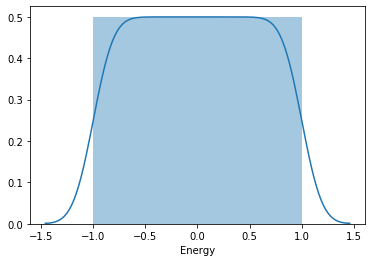

KeyError: 'Intensity'